In [1]:
import os
from pathlib import Path
import pandas as pd
import numpy as np
from pybaseball import batting_stats, statcast, cache
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn import preprocessing

In [2]:
cache.enable()

In [3]:
from datetime import datetime

In [4]:
data_path = 'batting.csv'
statcast_path = 'statcast-may.csv'

In [5]:
if Path(data_path).exists():
  df = pd.read_csv(data_path)
else:
  df = batting_stats(2000, 2022, qual=200)
  df_23 = batting_stats(2023, qual=30)
  df = pd.concat([df, df_23], axis=0)
  df.to_csv(data_path)

In [6]:
df.head()

,Unnamed: 0,IDfg,Season,Name,Team,Age,G,AB,PA,H,...,maxEV,HardHit,HardHit%,Events,CStr%,CSW%,xBA,xSLG,xwOBA,L-WAR
0,0,1109,2002,Barry Bonds,SFG,37,143,403,612,149,...,NaN,NaN,NaN,0,0.127,0.191,NaN,NaN,NaN,12.7
1,2,1109,2001,Barry Bonds,SFG,36,153,476,664,156,...,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,12.5
2,1,1109,2004,Barry Bonds,SFG,39,147,373,617,135,...,NaN,NaN,NaN,0,0.124,0.164,NaN,NaN,NaN,11.9
3,17,15640,2022,Aaron Judge,NYY,30,157,570,696,177,...,118.4,246.0,0.609,404,0.169,0.287,NaN,NaN,NaN,11.2
4,28,13611,2018,Mookie Betts,BOS,25,136,520,614,180,...,110.6,217.0,0.500,434,0.220,0.270,NaN,NaN,NaN,10.4


In [7]:
if Path(statcast_path).exists():
    realtime_stats = pd.read_csv(statcast_path)
else:
    realtime_stats = statcast(start_dt='2023-03-30', end_dt=datetime.today().strftime('%Y-%m-%d'))
    realtime_stats.to_csv(statcast_path)

In [8]:
realtime_stats.to_parquet(Path(statcast_path).with_suffix('.parquet'))

In [9]:
realtime2 = pd.read_parquet(Path(statcast_path).with_suffix('.parquet'))

In [10]:
realtime2.head()

,Unnamed: 0,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,...,fld_score,post_away_score,post_home_score,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment,spin_axis,delta_home_win_exp,delta_run_exp
0,3966,FF,2023-05-12,96.1,-2.43,5.70,"Smith, Drew",657041,622098,strikeout,...,3,3,2,2,3,Standard,Standard,206.0,-0.169,-0.332
1,4051,FF,2023-05-12,95.5,-2.44,5.69,"Smith, Drew",657041,622098,None,...,3,3,2,2,3,Standard,Standard,209.0,0.000,0.069
2,4143,FF,2023-05-12,95.1,-2.43,5.74,"Smith, Drew",657041,622098,None,...,3,3,2,2,3,Standard,Standard,212.0,0.000,-0.125
3,4273,SL,2023-05-12,83.4,-2.68,5.63,"Smith, Drew",657041,622098,None,...,3,3,2,2,3,Standard,Standard,74.0,0.000,-0.091
4,1458,FC,2023-05-12,91.5,-2.83,5.76,"Robertson, David",666906,502085,walk,...,3,3,2,2,3,Strategic,Standard,194.0,0.027,0.094


In [11]:
realtime_stats.head()

,Unnamed: 0,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,...,fld_score,post_away_score,post_home_score,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment,spin_axis,delta_home_win_exp,delta_run_exp
0,3966,FF,2023-05-12,96.1,-2.43,5.70,"Smith, Drew",657041,622098,strikeout,...,3,3,2,2,3,Standard,Standard,206.0,-0.169,-0.332
1,4051,FF,2023-05-12,95.5,-2.44,5.69,"Smith, Drew",657041,622098,NaN,...,3,3,2,2,3,Standard,Standard,209.0,0.000,0.069
2,4143,FF,2023-05-12,95.1,-2.43,5.74,"Smith, Drew",657041,622098,NaN,...,3,3,2,2,3,Standard,Standard,212.0,0.000,-0.125
3,4273,SL,2023-05-12,83.4,-2.68,5.63,"Smith, Drew",657041,622098,NaN,...,3,3,2,2,3,Standard,Standard,74.0,0.000,-0.091
4,1458,FC,2023-05-12,91.5,-2.83,5.76,"Robertson, David",666906,502085,walk,...,3,3,2,2,3,Strategic,Standard,194.0,0.027,0.094


In [12]:
realtime_stats.shape

(171265, 93)

In [13]:
realtime_stats.columns

Index(['Unnamed: 0', 'pitch_type', 'game_date', 'release_speed',
       'release_pos_x', 'release_pos_z', 'player_name', 'batter', 'pitcher',
       'events', 'description', 'spin_dir', 'spin_rate_deprecated',
       'break_angle_deprecated', 'break_length_deprecated', 'zone', 'des',
       'game_type', 'stand', 'p_throws', 'home_team', 'away_team', 'type',
       'hit_location', 'bb_type', 'balls', 'strikes', 'game_year', 'pfx_x',
       'pfx_z', 'plate_x', 'plate_z', 'on_3b', 'on_2b', 'on_1b',
       'outs_when_up', 'inning', 'inning_topbot', 'hc_x', 'hc_y',
       'tfs_deprecated', 'tfs_zulu_deprecated', 'fielder_2', 'umpire', 'sv_id',
       'vx0', 'vy0', 'vz0', 'ax', 'ay', 'az', 'sz_top', 'sz_bot',
       'hit_distance_sc', 'launch_speed', 'launch_angle', 'effective_speed',
       'release_spin_rate', 'release_extension', 'game_pk', 'pitcher.1',
       'fielder_2.1', 'fielder_3', 'fielder_4', 'fielder_5', 'fielder_6',
       'fielder_7', 'fielder_8', 'fielder_9', 'release_pos_y',


In [14]:
realtime_stats.loc[realtime_stats['player_name'] == 'Kershaw, Clayton']

,Unnamed: 0,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,...,fld_score,post_away_score,post_home_score,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment,spin_axis,delta_home_win_exp,delta_run_exp
8172,103,CH,2023-05-10,87.0,1.61,6.12,"Kershaw, Clayton",605119,477132,field_out,...,8,8,1,1,8,Standard,Standard,166.0,-0.001,-0.079
8173,116,SL,2023-05-10,85.8,1.52,6.10,"Kershaw, Clayton",605119,477132,NaN,...,8,8,1,1,8,Standard,Standard,232.0,0.000,-0.021
8174,124,SL,2023-05-10,86.6,1.53,6.11,"Kershaw, Clayton",670712,477132,strikeout,...,8,8,1,1,8,Standard,Standard,211.0,-0.002,-0.153
8175,143,FF,2023-05-10,90.8,1.39,5.98,"Kershaw, Clayton",670712,477132,NaN,...,8,8,1,1,8,Standard,Standard,176.0,0.000,0.031
8176,170,SL,2023-05-10,87.1,1.57,6.10,"Kershaw, Clayton",670712,477132,NaN,...,8,8,1,1,8,Standard,Standard,216.0,0.000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165063,3931,FF,2023-04-01,92.3,1.44,6.26,"Kershaw, Clayton",606466,477132,NaN,...,0,0,0,0,0,Standard,Standard,167.0,0.000,0.030
165064,4057,CU,2023-04-01,74.2,1.10,6.44,"Kershaw, Clayton",641786,477132,strikeout,...,0,0,0,0,0,Standard,Standard,350.0,0.022,-0.177
165065,4190,SL,2023-04-01,86.9,1.48,6.24,"Kershaw, Clayton",641786,477132,NaN,...,0,0,0,0,0,Standard,Standard,209.0,0.000,0.029
165066,4283,CU,2023-04-01,73.4,1.28,6.40,"Kershaw, Clayton",641786,477132,NaN,...,0,0,0,0,0,Standard,Standard,344.0,0.000,-0.052


In [15]:
kersh = realtime_stats.loc[realtime_stats['player_name'] == 'Kershaw, Clayton'].copy()

In [16]:
kersh['pitch_type'] = kersh['pitch_type'].astype('category')

In [17]:
kersh

,Unnamed: 0,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,...,fld_score,post_away_score,post_home_score,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment,spin_axis,delta_home_win_exp,delta_run_exp
8172,103,CH,2023-05-10,87.0,1.61,6.12,"Kershaw, Clayton",605119,477132,field_out,...,8,8,1,1,8,Standard,Standard,166.0,-0.001,-0.079
8173,116,SL,2023-05-10,85.8,1.52,6.10,"Kershaw, Clayton",605119,477132,NaN,...,8,8,1,1,8,Standard,Standard,232.0,0.000,-0.021
8174,124,SL,2023-05-10,86.6,1.53,6.11,"Kershaw, Clayton",670712,477132,strikeout,...,8,8,1,1,8,Standard,Standard,211.0,-0.002,-0.153
8175,143,FF,2023-05-10,90.8,1.39,5.98,"Kershaw, Clayton",670712,477132,NaN,...,8,8,1,1,8,Standard,Standard,176.0,0.000,0.031
8176,170,SL,2023-05-10,87.1,1.57,6.10,"Kershaw, Clayton",670712,477132,NaN,...,8,8,1,1,8,Standard,Standard,216.0,0.000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165063,3931,FF,2023-04-01,92.3,1.44,6.26,"Kershaw, Clayton",606466,477132,NaN,...,0,0,0,0,0,Standard,Standard,167.0,0.000,0.030
165064,4057,CU,2023-04-01,74.2,1.10,6.44,"Kershaw, Clayton",641786,477132,strikeout,...,0,0,0,0,0,Standard,Standard,350.0,0.022,-0.177
165065,4190,SL,2023-04-01,86.9,1.48,6.24,"Kershaw, Clayton",641786,477132,NaN,...,0,0,0,0,0,Standard,Standard,209.0,0.000,0.029
165066,4283,CU,2023-04-01,73.4,1.28,6.40,"Kershaw, Clayton",641786,477132,NaN,...,0,0,0,0,0,Standard,Standard,344.0,0.000,-0.052


In [18]:
kersh['zone'].unique()

array([ 3.,  7.,  8., 13.,  4., 12., 14.,  9.,  6.,  2.,  5.,  1., 11.])

In [19]:
kersh[['plate_x', 'plate_z']]

,plate_x,plate_z
8172,0.62,3.11
8173,-0.34,1.80
8174,0.20,1.71
8175,-0.43,1.09
8176,-0.52,2.33
...,...,...
165063,-0.45,3.59
165064,0.33,1.52
165065,-0.33,-0.17
165066,0.83,2.77


In [20]:
kersh[['plate_z', 'plate_x']]

,plate_z,plate_x
8172,3.11,0.62
8173,1.80,-0.34
8174,1.71,0.20
8175,1.09,-0.43
8176,2.33,-0.52
...,...,...
165063,3.59,-0.45
165064,1.52,0.33
165065,-0.17,-0.33
165066,2.77,0.83


In [21]:
strikes = kersh['zone'].loc[kersh['zone'].isin(list(range(1, 10)))]

In [22]:
zone = strikes.value_counts()

In [23]:
zone = zone.sort_index()

In [24]:
zone

zone
1.0    23
2.0    44
3.0    26
4.0    54
5.0    50
6.0    40
7.0    59
8.0    59
9.0    34
Name: count, dtype: int64

In [25]:
heat = np.array(zone).reshape(3,3)

In [26]:
heat

array([[23, 44, 26],
       [54, 50, 40],
       [59, 59, 34]])

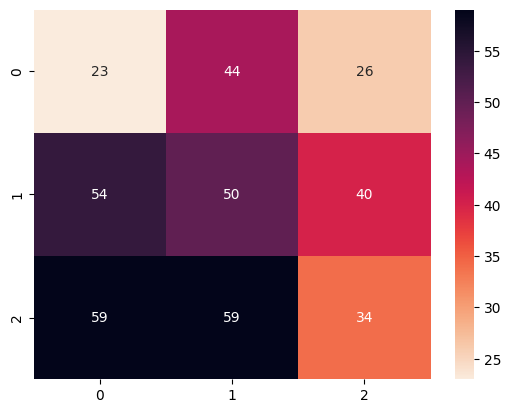

In [27]:
ax_heat = sns.heatmap(heat, annot=True, cmap=sns.color_palette("rocket_r", as_cmap=True))

In [28]:
kersh_scatter_strikes = kersh.loc[kersh['zone'].isin(list(range(1, 10)))]

In [29]:
kersh_scatter_strikes['plate_x'].max()/3

0.27666666666666667

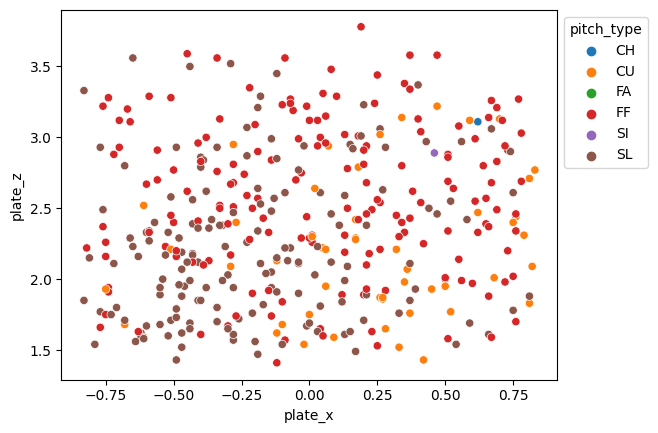

In [30]:
ax_scatter = sns.scatterplot(data=kersh_scatter_strikes, x ='plate_x', y='plate_z', hue='pitch_type')
sns.move_legend(ax_scatter, "upper left", bbox_to_anchor=(1, 1))

In [31]:
scaler = preprocessing.MinMaxScaler(feature_range=(0,3))

In [32]:
kersh_scatter_strikes.loc[:,'plate_x'] = scaler.fit_transform(kersh_scatter_strikes[['plate_x']])

In [33]:
scaler = preprocessing.MinMaxScaler(feature_range=(0,3))

In [34]:
kersh_scatter_strikes.loc[:,'plate_z'] = scaler.fit_transform(kersh_scatter_strikes[['plate_z']] * -1)

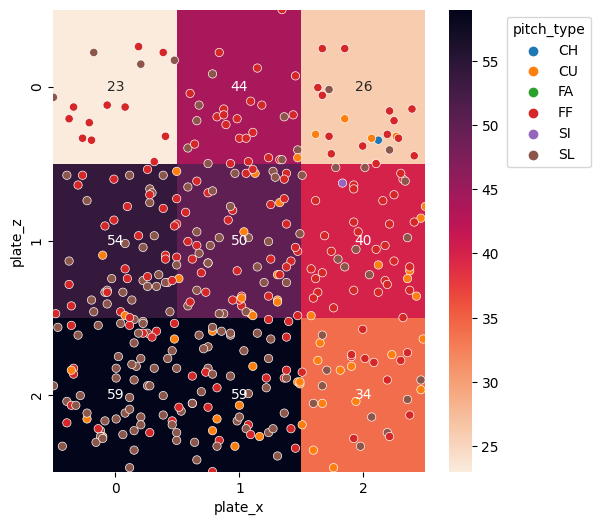

In [35]:
plt.figure(figsize=(6,6))

ax_heat = sns.heatmap(heat, annot=True, cmap=sns.color_palette("rocket_r", as_cmap=True))
ax_scatter = sns.scatterplot(ax=ax_heat, data=kersh_scatter_strikes, x='plate_x', y='plate_z', hue='pitch_type')
sns.move_legend(ax_scatter, "upper left", bbox_to_anchor=(1.2, 1))

In [36]:
kersh[['release_pos_x', 'release_pos_y', 'release_pos_z', 'pitch_type']]

,release_pos_x,release_pos_y,release_pos_z,pitch_type
8172,1.61,53.94,6.12,CH
8173,1.52,54.11,6.10,SL
8174,1.53,54.17,6.11,SL
8175,1.39,53.86,5.98,FF
8176,1.57,53.98,6.10,SL
...,...,...,...,...
165063,1.44,54.07,6.26,FF
165064,1.10,54.06,6.44,CU
165065,1.48,54.14,6.24,SL
165066,1.28,54.19,6.40,CU


In [37]:
from mpl_toolkits import mplot3d

In [38]:
fig = plt.figure()

<Figure size 640x480 with 0 Axes>

In [39]:
release_pos = kersh[['release_pos_x', 'release_pos_y', 'release_pos_z', 'pitch_type']].copy()

In [40]:
kersh['pitch_type'].unique()

['CH', 'SL', 'FF', 'CU', 'SI', 'FA']
Categories (6, object): ['CH', 'CU', 'FA', 'FF', 'SI', 'SL']

In [41]:
from sklearn.preprocessing import MinMaxScaler

In [42]:
colors={'SL': 'red', 'CU': 'blue', 'FF': 'purple', 'CH': 'green', 'SI': 'yellow', 'FA': 'pink'}

In [43]:
release_pos = pd.DataFrame(MinMaxScaler().fit_transform(np.array(release_pos[['release_pos_x', 'release_pos_y', 'release_pos_z']])), columns=['release_pos_x', 'release_pos_y', 'release_pos_z'])

In [44]:
pt = pd.DataFrame(kersh[['pitch_type']])

In [45]:
pt = pt.reset_index(drop=True)

In [46]:
release_pos = release_pos.reset_index(drop=True)

In [47]:
release_pos = pd.concat([release_pos, pt], axis=1)

In [48]:
release_pos

,release_pos_x,release_pos_y,release_pos_z,pitch_type
0,0.455090,0.132029,0.107623,CH
1,0.401198,0.173594,0.098655,SL
2,0.407186,0.188264,0.103139,SL
3,0.323353,0.112469,0.044843,FF
4,0.431138,0.141809,0.098655,SL
...,...,...,...,...
731,0.353293,0.163814,0.170404,FF
732,0.149701,0.161369,0.251121,CU
733,0.377246,0.180929,0.161435,SL
734,0.257485,0.193154,0.233184,CU


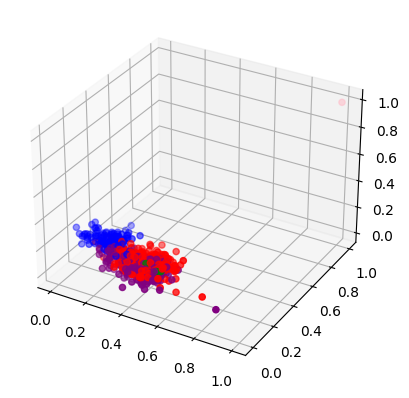

In [49]:
ax = plt.axes(projection='3d')
ax.scatter3D(release_pos['release_pos_x'], release_pos['release_pos_y'], release_pos['release_pos_z'], c=release_pos['pitch_type'].map(colors))

In [50]:
from sklearn.cluster import KMeans

In [51]:
kmeans = KMeans(len(release_pos['pitch_type'].astype(str).unique()))

In [52]:
release_pos_only = release_pos.drop(columns='pitch_type')

In [53]:
preds = kmeans.fit_predict(release_pos_only)

/home/brandon/.pyenv/versions/3.11.3/envs/venv/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [54]:
preds

array([4, 4, 1, 3, 4, 4, 0, 4, 4, 0, 5, 4, 4, 3, 3, 3, 0, 3, 3, 3, 3, 0,
       3, 1, 0, 3, 5, 3, 3, 3, 3, 0, 1, 4, 4, 0, 4, 4, 4, 4, 0, 5, 3, 4,
       4, 4, 4, 5, 0, 4, 1, 4, 1, 1, 4, 4, 5, 5, 4, 0, 1, 4, 0, 5, 1, 1,
       1, 0, 5, 4, 1, 4, 1, 4, 3, 0, 5, 1, 5, 1, 3, 3, 0, 0, 1, 1, 1, 1,
       5, 5, 0, 1, 3, 3, 0, 3, 4, 3, 4, 3, 4, 0, 3, 3, 3, 0, 3, 3, 3, 0,
       4, 3, 3, 3, 3, 4, 4, 4, 0, 4, 4, 4, 3, 3, 3, 4, 4, 4, 3, 4, 4, 4,
       3, 0, 3, 3, 3, 3, 3, 4, 4, 0, 4, 4, 4, 5, 4, 1, 5, 5, 5, 4, 3, 4,
       1, 1, 0, 4, 4, 3, 3, 3, 3, 1, 1, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       0, 4, 4, 4, 4, 1, 0, 4, 3, 4, 3, 3, 4, 1, 0, 3, 3, 3, 3, 3, 4, 1,
       4, 5, 4, 0, 5, 5, 0, 1, 5, 4, 5, 5, 5, 4, 5, 4, 3, 3, 0, 3, 4, 3,
       1, 5, 4, 5, 5, 4, 4, 4, 0, 5, 5, 1, 4, 5, 5, 5, 4, 1, 0, 4, 4, 5,
       1, 5, 4, 4, 3, 0, 1, 0, 5, 0, 5, 5, 1, 1, 0, 1, 1, 1, 5, 4, 5, 4,
       5, 1, 1, 4, 3, 1, 4, 5, 5, 5, 5, 5, 0, 4, 5, 4, 3, 4, 4, 4, 5, 4,
       0, 1, 0, 0, 4, 4, 1, 1, 4, 3, 4, 4, 4, 1, 1,

In [55]:
pitch = release_pos['pitch_type'].cat.codes

In [56]:
pitch

0      0
1      5
2      5
3      3
4      5
      ..
731    3
732    1
733    5
734    1
735    3
Length: 736, dtype: int8

In [57]:
color_codes={0: 'red', 1: 'blue', 2: 'purple', 3: 'green', 4: 'yellow', 5: 'pink'}

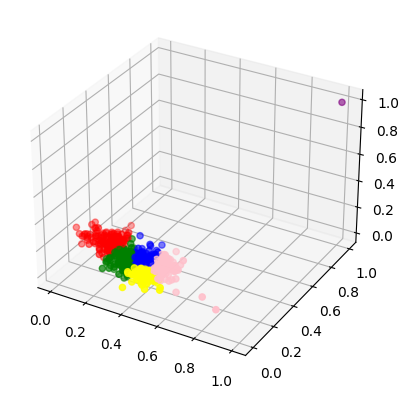

In [58]:
ax = plt.axes(projection='3d')
ax.scatter3D(release_pos['release_pos_x'], release_pos['release_pos_y'], release_pos['release_pos_z'], c=pd.Series(preds).map(color_codes))

In [59]:
from sklearn_extra.cluster import KMedoids

In [60]:
kmed = KMedoids(len(release_pos['pitch_type'].astype(str).unique()))

In [61]:
preds_med = kmed.fit_predict(release_pos_only)

/home/brandon/.pyenv/versions/3.11.3/envs/venv/lib/python3.11/site-packages/sklearn_extra/cluster/_k_medoids.py:329: UserWarning: Cluster 1 is empty! self.labels_[self.medoid_indices_[1]] may not be labeled with its corresponding cluster (1).
  warnings.warn(


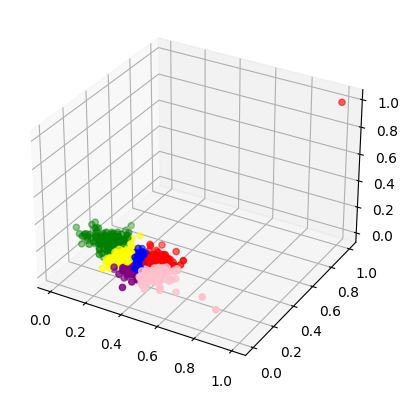

In [62]:
ax = plt.axes(projection='3d')
ax.scatter3D(release_pos['release_pos_x'], release_pos['release_pos_y'], release_pos['release_pos_z'], c=pd.Series(preds_med).map(color_codes))

In [63]:
release_pos_no_outliers = release_pos.loc[(release_pos['release_pos_x'] < 0.6) & (release_pos['release_pos_y'] < 0.8) & (release_pos['release_pos_z'] < 0.8)]

In [63]:
release_pos_no_outliers = release_pos.loc[(release_pos['release_pos_x'] < 0.6) & (release_pos['release_pos_y'] < 0.8) & (release_pos['release_pos_z'] < 0.8)]

In [64]:
release_pos_no_outliers_only = release_pos_no_outliers.drop(columns='pitch_type')

In [65]:
preds_med = kmed.fit_predict(release_pos_no_outliers_only)

/home/brandon/.pyenv/versions/3.11.3/envs/venv/lib/python3.11/site-packages/sklearn_extra/cluster/_k_medoids.py:329: UserWarning: Cluster 2 is empty! self.labels_[self.medoid_indices_[2]] may not be labeled with its corresponding cluster (2).
  warnings.warn(


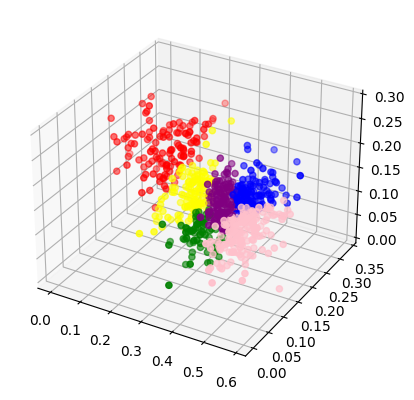

In [66]:
ax = plt.axes(projection='3d')
ax.scatter3D(release_pos_no_outliers_only['release_pos_x'], release_pos_no_outliers_only['release_pos_y'], release_pos_no_outliers_only['release_pos_z'], c=pd.Series(preds_med).map(color_codes))

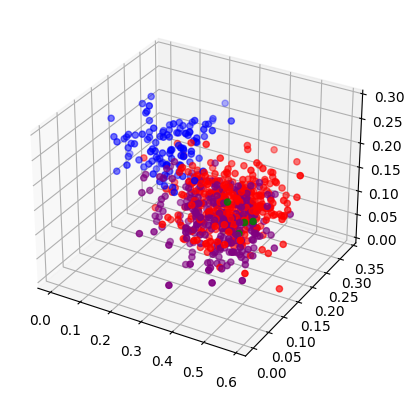

In [67]:
ax = plt.axes(projection='3d')
ax.scatter3D(release_pos_no_outliers['release_pos_x'], release_pos_no_outliers['release_pos_y'], release_pos_no_outliers['release_pos_z'], c=release_pos_no_outliers['pitch_type'].map(colors))

In [ ]:
input_size, hidden_size, num_layers = 0, 0, 0

In [ ]:
import tensorflow as tf

2023-05-30 21:12:08.286146: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-05-30 21:12:08.422180: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-05-30 21:12:08.422845: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-30 21:12:09.310455: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [ ]:
inputs = tf.random.normal([32, 10, 8])

2023-05-30 21:12:10.727272: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:09:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-05-30 21:12:10.727644: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [ ]:
num_pitches = len(pitch.unique())

In [ ]:
lstm = tf.keras.layers.LSTM(num_pitches)

In [ ]:
num_pitches

6

In [ ]:
inputs

<tf.Tensor: shape=(32, 10, 8), dtype=float32, numpy=
array([[[ 0.11162679, -0.01141569, -1.1076267 , ...,  2.2754984 ,
          0.86894155, -1.4141797 ],
        [-1.627963  , -0.22101831, -0.13710319, ..., -0.40904424,
         -0.25059292, -0.77087295],
        [-1.8489418 , -0.6111491 , -0.53275055, ..., -0.6788936 ,
         -0.97349215, -0.82669127],
        ...,
        [ 0.62807214, -1.2015239 ,  0.6874624 , ..., -2.0928836 ,
          1.1382921 , -0.156518  ],
        [ 0.34252226, -0.62953943,  0.24317694, ..., -2.0243976 ,
          0.46863303,  1.0023417 ],
        [ 0.24176878, -0.62441367, -0.50554407, ...,  1.3474629 ,
         -0.18414904, -0.862712  ]],

       [[-1.120043  , -0.54567903,  0.26509893, ..., -0.5038772 ,
         -0.522409  , -0.9433489 ],
        [ 0.7793027 , -1.7820351 , -1.0300822 , ...,  0.191779  ,
         -1.3199666 ,  0.750802  ],
        [-0.7725497 ,  1.7243767 , -0.08494306, ...,  0.38240212,
          0.27949214,  1.0127755 ],
        ...,
 

In [115]:
output = lstm(inputs)

Identify pitch sequences
* (Naive) Track order of pitches for an at-bat based on count
* Utilize batter-pitcher matchup sequencing
* [Optional] Include pitch location

In [76]:
# model = keras.models.Sequential()
# model.add(keras.layers.LSTM(cfg.LSTM, input_shape=(cfg.TIMESTEPS,
#                   cfg.FEATURES),
#                   return_sequences=True))
# model.add(SeqSelfAttention(attention_width=cfg.ATTNWIDTH,
#                 attention_type=SeqSelfAttention.ATTENTION_TYPE_MUL,
#                 attention_activation='softmax',
#                 name='Attention'))
# model.add(keras.layers.Dense(cfg.DENSE))
# model.add(keras.layers.Dense(cfg.OUTPUT, activation='sigmoid'))
#
# https://stackoverflow.com/questions/58966874/adding-attention-on-top-of-simple-lstm-layer-in-tensorflow-2-0

In [77]:
kersh.columns

Index(['Unnamed: 0', 'pitch_type', 'game_date', 'release_speed',
       'release_pos_x', 'release_pos_z', 'player_name', 'batter', 'pitcher',
       'events', 'description', 'spin_dir', 'spin_rate_deprecated',
       'break_angle_deprecated', 'break_length_deprecated', 'zone', 'des',
       'game_type', 'stand', 'p_throws', 'home_team', 'away_team', 'type',
       'hit_location', 'bb_type', 'balls', 'strikes', 'game_year', 'pfx_x',
       'pfx_z', 'plate_x', 'plate_z', 'on_3b', 'on_2b', 'on_1b',
       'outs_when_up', 'inning', 'inning_topbot', 'hc_x', 'hc_y',
       'tfs_deprecated', 'tfs_zulu_deprecated', 'fielder_2', 'umpire', 'sv_id',
       'vx0', 'vy0', 'vz0', 'ax', 'ay', 'az', 'sz_top', 'sz_bot',
       'hit_distance_sc', 'launch_speed', 'launch_angle', 'effective_speed',
       'release_spin_rate', 'release_extension', 'game_pk', 'pitcher.1',
       'fielder_2.1', 'fielder_3', 'fielder_4', 'fielder_5', 'fielder_6',
       'fielder_7', 'fielder_8', 'fielder_9', 'release_pos_y',


In [89]:
naive = ['pitch_count', 'pitch_number', 'pitch_type', 'balls', 'strikes', 'inning', 'outs_when_up', 'bat_score', 'fld_score', 'stand', 'type', 'pitcher', 'events']
advanced = ['release_spin_rate', 'batter', 'bb_type', 'release_speed', 'game_date', 'launch_speed', 'launch_speed_angle', 'spin_axis', 'game_type']

# Feature Selection

## Naive (Basic) Approach

* pitch number = number of pitches thrown by pitcher
* pitch type = what pitch was thrown
* balls = number of balls thrown in at-bat
* strikes = number of strikes thrown in at-bat
* inning = the inning designation for the pitch
* outs_when_up = the number of outs prior to the at-bat
* bat_score = score of the batting team
* fld_score = score of the fielding team
* stand = which side of the plate the batter is hitting from
* pitcher = Pitcher unique ID number

### Why for naive features?
* pitch number = pitch type may have correlation with pitch type (pitch types may be omitted as pitch number increases)
* inning = later in the game may have an effect on pitch types utilized
* balls, strikes, outs_when_up = balls, strikes, outs must be taken into account
* bat_score, fld_score = score has an effect on pitch type
* stand = side of the plate has an effect on pitch type

### Naive (Basic) Feature Dtypes

* pitch number = just integer
* pitch type = one-hot encoding
* balls = integer
* strikes = integer
    - consider merging balls and strikes as single feature for percentage in favor of pitcher/batter
* inning = integer (or one-hot)
* outs_when_up = integer or category
* bat_score = integer
* fld_score = integer
    - Maybe just use the scores as leading/behind? Big lead, small lead, etc.?
* stand = category
* pitcher = integer


## Advanced Approach
  Utilizes batter-pitcher matchups, and how effective the pitches have been in the outing

* release_spin_rate = spin rate of pitch at release
* batter = batter unique ID number
* events = Event of resulting plate appearance
* bb_type = Batted ball type [ground_ball, line_drive, fly_ball, popup]
* type = short hand of pitch result. B = ball, S = strike, X = in play.
* release_speed = pitch velocity at time of release
* game_date = date that the game is played
* launch_speed = speed that the ball comes off the bat
* launch_speed_angle = angle that the ball comes off the bat, [1: Weak, 2: Topped, 3: Under, 4: Flare/Burner, 5: Solid Contact, 6: Barrel]
* spin_axis = The Spin Axis in the 2D X-Z plane in degrees from 0 to 360, such that 180 represents a pure backspin fastball and 0 degrees represents a pure topspin (12-6) curveball
* game_type = Type of Game. E = Exhibition, S = Spring Training, R = Regular Season, F = Wild Card, D = Divisional Series, L = League Championship Series, W = World Series

In [79]:
kersh['pitch_number']

8172      2
8173      1
8174      6
8175      5
8176      4
         ..
165063    1
165064    4
165065    3
165066    2
165067    1
Name: pitch_number, Length: 736, dtype: int64

In [80]:
kersh['pitch_number'].unique()

array([ 2,  1,  6,  5,  4,  3,  8,  7, 13, 12, 11, 10,  9])

In [81]:
# pitch number = just integer
# pitch type = one-hot encoding
# balls = integer
# strikes = integer
# consider merging balls and strikes as single feature for percentage in favor of pitcher/batter
# inning = integer (or one-hot)
# outs_when_up = integer or category
# bat_score = integer
# fld_score = integer
# Maybe just use the scores as leading/behind? Big lead, small lead, etc.?
# stand = category
# pitcher = integer

In [82]:
kersh['at_bat_number'].unique()

array([59, 58, 57, 52, 51, 50, 39, 38, 37, 36, 28, 27, 26, 25, 19, 18, 17,
       13, 12, 11,  7,  6,  5,  4, 42, 41, 40, 35, 31, 30, 29, 24, 23, 22,
       21, 16, 15, 14, 10,  9,  8, 46, 45, 44, 43, 33, 32,  3,  2,  1, 48,
       47, 54, 53, 56, 20, 55])

groupby(at_bat_number, game_pk), max(pitch number), reduce to accumulate max of last

In [83]:
# Generates a pitch_count column based on game_pk and at_bat_number
at_bat_pitch_max = pd.DataFrame(kersh.groupby(['game_pk', 'at_bat_number']).apply(lambda x: x['pitch_number'].max()).groupby(['game_pk']).cumsum().shift(1).fillna(0))
pitch_number = pd.DataFrame(kersh.groupby(['game_pk', 'at_bat_number']).apply(lambda x: x['pitch_number']))
pitch_count = pd.merge(pitch_number, at_bat_pitch_max, on=['game_pk', 'at_bat_number'])
pitch_count['pitch_count'] = pitch_count['pitch_number'] + pitch_count[0]
pitch_count.drop(columns=[0], inplace=True)
kersh.drop(columns=['Unnamed: 0'], inplace=True)
v = pd.merge(pitch_count, kersh, on=['game_pk', 'at_bat_number', 'pitch_number']).sort_values(['game_pk', 'at_bat_number', 'pitch_count'])

In [121]:
naive_vector = v.loc[:,naive]

In [92]:
naive_vector['events'].unique()

array([nan, 'strikeout', 'field_out', 'single',
       'grounded_into_double_play', 'home_run', 'double', 'walk',
       'force_out', 'field_error', 'sac_fly', 'fielders_choice',
       'hit_by_pitch'], dtype=object)

In [91]:
naive_vector.head()

,pitch_count,pitch_number,pitch_type,balls,strikes,inning,outs_when_up,bat_score,fld_score,stand,type,pitcher,events
2,1.0,1,FF,0,0,1,0,0,0,R,S,477132,NaN
1,2.0,2,CU,0,1,1,0,0,0,R,S,477132,NaN
0,3.0,3,SL,0,2,1,0,0,0,R,S,477132,strikeout
6,4.0,1,SL,0,0,1,1,0,0,R,B,477132,NaN
5,5.0,2,SL,1,0,1,1,0,0,R,B,477132,NaN


Event Scoring:
    0 - Nan
    +1.5 - strikeout
    +1 - fielders_choice
    +1 - field_out
    +1 - force_out
    +2 - grounded_into_double_play
    -0.5 - field_error
    -1 - walk
    -1 - single
    -1.5 - hit_by_pitch
    -2 - double
    -3 - triple
    -4 - home_run
    -3 - sac_fly

In [95]:
event_scoring = {
    'strikeout': 1.5,
    'fielders_choice': 1,
    'field_out': 1,
    'force_out': 1,
    'grounded_into_double_play': 2,
    'field_error': -0.5,
    'walk': -1,
    'single': -1,
    'hit_by_pitch': -1.5,
    'double': -2,
    'triple': -3,
    'home_run': -4,
    'sac_fly': -1
}

In [122]:
naive_vector['event_scoring'] = naive_vector.events.apply(lambda x: event_scoring[x] if not pd.isnull(x) else 0)

In [123]:
naive_vector

,pitch_count,pitch_number,pitch_type,balls,strikes,inning,outs_when_up,bat_score,fld_score,stand,type,pitcher,events,event_scoring
2,1.0,1,FF,0,0,1,0,0,0,R,S,477132,NaN,0.0
1,2.0,2,CU,0,1,1,0,0,0,R,S,477132,NaN,0.0
0,3.0,3,SL,0,2,1,0,0,0,R,S,477132,strikeout,1.5
6,4.0,1,SL,0,0,1,1,0,0,R,B,477132,NaN,0.0
5,5.0,2,SL,1,0,1,1,0,0,R,B,477132,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
733,72.0,1,FF,0,0,6,1,1,8,R,S,477132,NaN,0.0
732,73.0,2,CU,0,1,6,1,1,8,R,B,477132,NaN,0.0
731,74.0,3,SL,1,1,6,1,1,8,R,X,477132,field_out,1.0
735,75.0,1,FF,0,0,6,2,1,8,R,S,477132,NaN,0.0


In [125]:
# pitch_type = naive_vector.pop('pitch_type')

In [124]:
naive_vector['pitch_type'] = naive_vector.pitch_type.cat.codes

In [120]:
from sklearn.model_selection import train_test_split

In [129]:
train_X, test_X = train_test_split(naive_vector, test_size=0.2, random_state=23)

In [130]:
train_y = train_X.pop('pitch_type')
test_y = test_X.pop('pitch_type')

In [118]:
import tensorflow as tf
import tensorflow.keras.layers as layers
from tensorflow.keras import Input
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.models import load_model, Model

In [133]:
train_X.shape

(588, 13)

In [131]:
train_X.shape[2]

IndexError: tuple index out of range

In [119]:
model = tf.keras.models.Sequential()
model.add(layers.LSTM(cfg.LSTM, input_shape=(cfg.SEQUENCES,
          train_X.shape[2]),
          return_sequences=True))
model.add(Attention(name='attention_weight'))
model.add(layers.Dense(train_Y.shape[2], activation='sigmoid'))

NameError: name 'cfg' is not defined

In [ ]:
#https://www.tensorflow.org/tutorials/structured_data/time_series